## Аннотация

В данной работе рассматривается применение принципа авторегрессии для построения прогнозов с использованием методов машинного обучения и последующего выявления аномалий во временных рядах. Данный принцип будет реализован на реальных данных о количестве поступивших заявок на сервисное обслуживание от одного из ведущих отечественных автопроизводителей.

## Теоретическая часть

Для того чтобы построить точный прогноз, необходимо выбрать модель, обладающую наилучшей способностью к прогнозированию, а также определить оптимальную глубину авторегрессии. Глубина авторегрессии подразумевает количество предыдущих дней, данные о которых будут использоваться для построения прогноза. Важно выбрать именно то количество дней, которое обеспечит наибольшую точность прогнозов, позволяя учесть все закономерности в данных.

Кроме того, важно чётко определить, что мы понимаем под аномалией во временных рядах. Для этого сначала строится прогноз с помощью наиболее эффективной модели машинного обучения, после чего рассчитываются ошибки прогноза — разница между предсказанными и фактическими (тесовыми) значениями наблюдаемой характеристики (количества заявок) в разные моменты времени. Предполагается, что эти ошибки распределены по нормальному закону. Чтобы определить, является ли текущее значение искомой характеристики аномальным, вводится калибровочный коэффициент — пороговое значение ошибки, вероятность превышения которого достаточно мала. Если ошибка прогноза превышает этот порог, текущее наблюдение считается аномальным.

## Цель

Цель работы заключается в выявлении аномалий во временных рядах количества заявок на сервисное обслуживание автомобилей. Это позволит обеспечить более эффективное управление ресурсами.

## Задачи

1. Определить наиболее эффективную модель машинного обучения из имеющегося набора моделей и установить оптимальную глубину авторегрессии для построения прогнозов.
2. Определить калибровочные границы для ошибок отклонений, которые помогут выявлять аномальные значения искомой характеристики во временных рядах.

## Литература	

Мосин, В. Г. Предиктивная детекция аномалий в процессе гарантийного обслуживания автомобилей / В.Г. Мосин // Известия Тульского государственного университета. Технические науки. — 2024. — № 12. — С. 506–513. 

Мосин, В. Г. Методика MCCP (modeling, calibration, challenge, production) в сравнительном анализе пунктов гарантийного обслуживания автомобилей / В.Г. Мосин, В.Н. Козловский, А.С. Клентак, О.В. Пантюхин // Известия Тульского государственного университета. Технические науки. — 2025. — № 1. — С. 272–289. 


# Импорт необходимых библиотек 

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import sklearn.tree 
import sklearn.ensemble
import sklearn.svm 
import sklearn.neighbors
import sklearn.neural_network
import sklearn.model_selection
from sklearn.metrics import r2_score

# Настройка стиля графиков 

In [423]:
# выбор стиля визуализации
sns.set(context = 'paper', style='whitegrid', palette = 'deep')

# настройка подписей
plt.rcParams['font.family'] = 'Arial' 
plt.rcParams['font.size'] = 12 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 10 

# Чтение данных

In [424]:
ML = pd.read_csv('ML.csv')[-200:]

In [425]:
ML

date_in  44360  11785  44560  45460  42060  60360  19860  30563  \
519  2024-06-14    120     21     78     49     68     49     46     20   
520  2024-06-15    127     51     55     63     43     31     27     19   
521  2024-06-16     97     34     43     70     46     21     17     57   
522  2024-06-17     61     16     31     43      0     34     33     34   
523  2024-06-18     85     67     52     46     69     39     37     35   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
714  2024-12-26    110     16     50     40     50     17     30     45   
715  2024-12-27    118     33     73     36     39     41     20     47   
716  2024-12-28    121     10     21     11     25     12     11     16   
717  2024-12-29     78     10     13     35     19      0      2     23   
718  2024-12-30     57     25      0      4      0      0      2     22   

     45070  ...  43063  30863  12561  44063  61470  42360  24863  66463  \
519     50  ...     37      5      0     11     13      7     15     14   
520     29  ...      8      7      0      2      8     10     10     21   
521     41  ...      0      0      0     14      0      0     14      0   
522      5  ...      0      0      0      0      0     20      7      0   
523     44  ...     15     22      0      0     24      7     14     21   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
714     42  ...     15      7      0      4     11     10      0      0   
715     50  ...     18      8      0      0      0      0      0     10   
716     45  ...     13     11      0     27      7     16      0      7   
717     32  ...     12      2      0      3     39      4      0      8   
718      4  ...      0      0      0      0      1      3      0      0   

     44670  61063  
519      7      0  
520     15      0  
521      0      0  
522      0      0  
523      9      0  
..     ...    ...  
714     12     19  
715     15      4  
716     15      0  
717      8     19  
718      6      0  

[200 rows x 60 columns]

In [426]:
# установка новой индексации
ML.reset_index(drop=True, inplace=True) 

In [427]:
ML

date_in  44360  11785  44560  45460  42060  60360  19860  30563  \
0    2024-06-14    120     21     78     49     68     49     46     20   
1    2024-06-15    127     51     55     63     43     31     27     19   
2    2024-06-16     97     34     43     70     46     21     17     57   
3    2024-06-17     61     16     31     43      0     34     33     34   
4    2024-06-18     85     67     52     46     69     39     37     35   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
195  2024-12-26    110     16     50     40     50     17     30     45   
196  2024-12-27    118     33     73     36     39     41     20     47   
197  2024-12-28    121     10     21     11     25     12     11     16   
198  2024-12-29     78     10     13     35     19      0      2     23   
199  2024-12-30     57     25      0      4      0      0      2     22   

     45070  ...  43063  30863  12561  44063  61470  42360  24863  66463  \
0       50  ...     37      5      0     11     13      7     15     14   
1       29  ...      8      7      0      2      8     10     10     21   
2       41  ...      0      0      0     14      0      0     14      0   
3        5  ...      0      0      0      0      0     20      7      0   
4       44  ...     15     22      0      0     24      7     14     21   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
195     42  ...     15      7      0      4     11     10      0      0   
196     50  ...     18      8      0      0      0      0      0     10   
197     45  ...     13     11      0     27      7     16      0      7   
198     32  ...     12      2      0      3     39      4      0      8   
199      4  ...      0      0      0      0      1      3      0      0   

     44670  61063  
0        7      0  
1       15      0  
2        0      0  
3        0      0  
4        9      0  
..     ...    ...  
195     12     19  
196     15      4  
197     15      0  
198      8     19  
199      6      0  

[200 rows x 60 columns]

In [428]:
# выделение дат в отдельную таблицу
moment_encoding = ML[['date_in']].copy()

In [394]:
moment_encoding 

date_in
0    2024-06-14
1    2024-06-15
2    2024-06-16
3    2024-06-17
4    2024-06-18
..          ...
195  2024-12-26
196  2024-12-27
197  2024-12-28
198  2024-12-29
199  2024-12-30

[200 rows x 1 columns]

In [395]:
# удаление столбца с датами в основной таблице
ML = ML.drop(columns=['date_in'])

# Разбиение на обучающие и тестовые выборки

In [396]:
train = ML.iloc[:100]
test = ML.iloc[100:150]

# Набор моделей машиного обучения 

In [397]:
model_LN = sklearn.linear_model.LinearRegression()
model_DTR = sklearn.tree.DecisionTreeRegressor() 
model_RFR = sklearn.ensemble.RandomForestRegressor()
model_GBR = sklearn.ensemble.GradientBoostingRegressor()
model_SVR = sklearn.svm.SVR()
model_KNR = sklearn.neighbors.KNeighborsRegressor()

In [398]:
models = [model_LN, model_DTR, model_RFR, model_GBR, model_SVR, model_KNR] 
models_names = ['LN', 'DTR', 'RFR', 'GBR', 'SVR', 'KNR'] 

# Применение авторегрессионного принципа в прогнозировании, оценка эффективности моделей МО с помощью коэффициента детерминации и выбор лучшей модели

In [401]:
# функция для создания таблицы со смещениями
def create_lagged_table(train,loc,dive):
    train_lag = pd.DataFrame()
    train_lag['value'] = train[loc] # целевая функция
    for lag in range(1, dive+1): 
        train_lag[f'{loc}_lag_{lag}'] = train_lag['value'].shift(lag) # смещения от 1 до глубины авторегрессии
    train_lag.dropna(inplace=True) # удаление строк с пропусками 
    return train_lag

In [400]:
# функция для построения прогнозов на каждый день
def predict_next_step(train_lag,list_pred):
    X_train = train_lag.drop(columns='value') # тренировочные данные 
    y_train = train_lag['value'] # тестовые данные
    model.fit(X_train,y_train) # обучение модели 
    X_test = train_lag.iloc[-1][:-1].values # расширение тестовых данных
    X_test =  dict(zip(model.feature_names_in_, X_test)) # словарь {'признак': значение}
    arg = pd.DataFrame([X_test])
    yi_pred = model.predict(arg) # прогоз 
    list_pred.append(yi_pred) # прогнозы по всем локациям
    return list_pred

In [399]:
#  функция для оценки эффективности модели (рассчитывает коэффициент детерминации на разных глубинах авторегрессии)
def modeling_by_moments(autoregression_dive_max,train,test,model,model_name):
    R2_list = [] # список с коэффициентами детерминации 
    for dive in range(1,autoregression_dive_max+1): 
        train = ML.iloc[:100]#  обновление тренеровочных данных 
        pred = pd.DataFrame() # прогнозы по всем дням из тестовых данных
        for index in test.index:
            list_pred = [] # список с прогнозами на день для одной локации
            for loc in train.columns: # перебор локаций
                train_lag = create_lagged_table(train,loc,dive) 
                list_pred = predict_next_step(train_lag,list_pred) 
            arg = pd.DataFrame(test.loc[index])
            train = pd.concat([train, arg.transpose()])
            lp = dict(zip(test.columns.values, list_pred)) # создание словаря {'локация': кол-во заявок}
            lp = pd.DataFrame(lp) 
            pred = pd.concat([pred, lp], ignore_index=True) # обьединие датафреймов (как union в sql)
            pred.to_csv('pred_for_'+model_name+'_dive_'+str(dive)+'.csv')
        R2 = r2_score(test.values.ravel(), pred.values.ravel())  # коэффициент детерминации для модели 
        R2_list.append(R2)
    return R2_list    

In [402]:
# расчет коэффициента детерминации для каждой модели на разных глубинах авторегрессии
R2_res = [] 
for model, model_name in zip(models, models_names):
    R2_list = modeling_by_moments(10,train,test,model,model_name)
    R2_res.append(R2_list)

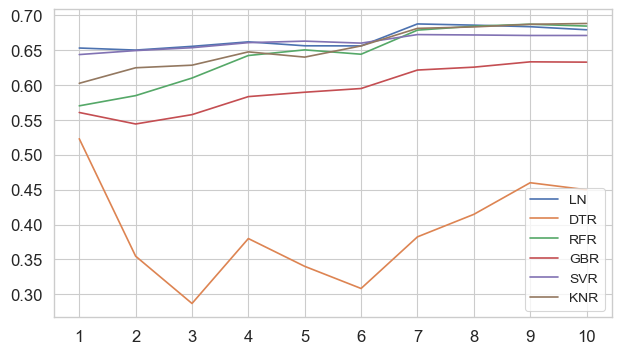

In [403]:
# построение графиков для оценки эфффективности каждой можели на разных глубинах
plt.figure(figsize = (7.2, 4))
for i in range(0,6):
    r2 = R2_res[i]
    plt.plot(list(range(1,11)),r2, label=models_names[i])
    i+=1
plt.xticks(np.arange(1, 11), labels = np.arange(1, 11))
plt.legend(loc = 4)
plt.grid(True)
plt.show()

In [404]:
# прогнозы самой эффективной модели 
pred_by_best_model = pd.read_csv('pred_for_LN_dive_7.csv', index_col=0)

In [405]:
# смещение индекса на 100
pred_by_best_model.index = pred_by_best_model.index + 100

# Рейтинг абсолютных ошибок отклонений и определение калибровочных границ

In [407]:
# расчет ошибок оклонений
errors = test-pred_by_best_model

In [408]:
# расчет абсолютных ошибок отклонений 
abs_errors = abs(errors)

In [409]:
# массив ошибок отклонений
error_array = errors.values.ravel()

In [410]:
# массив абсолютных ошибок отклонений
arrey_abs_errors = abs_errors.values.ravel()

In [411]:
# сортировка
arrey_abs_errors.sort()

In [412]:
# выделение уникальных значений в массиве
arrey_abs_errors = np.unique(arrey_abs_errors)

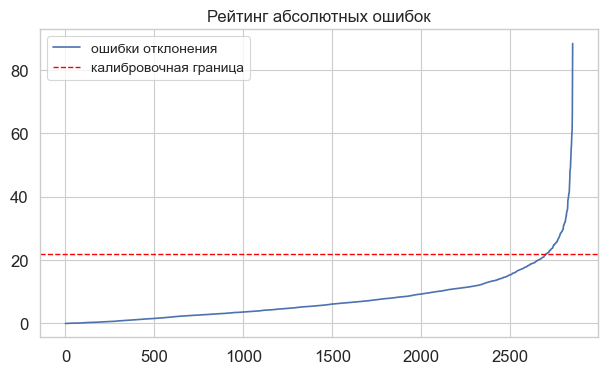

In [413]:
# график рейтинга абсолютных отклонений
delta_cr = 22 # калибровочная граница
plt.figure(figsize = (7.2, 4))
plt.plot(arrey_abs_errors, label ='ошибки отклонения')
plt.axhline(y = delta_cr, color = 'red', ls = '--', lw = 1, label ='калибровочная граница')
plt.legend()
plt.title('Рейтинг абсолютных ошибок')
plt.show()

#  Распеределение ошибок отклонений

In [414]:
# выборочное стандартное отклонение
sigma = np.std(arrey_abs_errors, ddof=1)

In [415]:
# значения для вертикальных линий (для графика)
x_lines = [-delta_cr, delta_cr]
sigma_lines = [-3*sigma, 3*sigma]
sigma_labels = ['-3$\sigma$', '3$\sigma$']
y_min = 0  
y_max = 0.2 

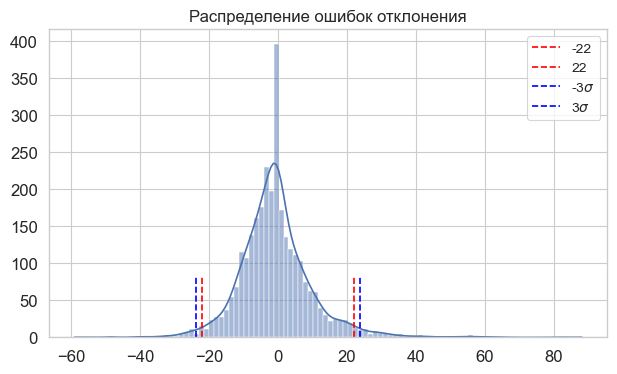

In [416]:
plt.figure(figsize=(7.2, 4)) # построение гистограммы
sns.histplot(error_array, kde=True) # добавление ядерной оценки плотности
for x in x_lines:
    plt.axvline(x=x, ymin=y_min, ymax=y_max, color='red', linestyle='--', label=x) # добавление вертикальных линий для калибровочных краниц
for x1,x2  in zip(sigma_lines,sigma_labels):
    plt.axvline(x=x1, ymin=y_min, ymax=y_max, color='blue', linestyle='--', label=x2) # добавление вертикальных линий для СТД
# настройка заголовков и меток
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.title('Распределение ошибок отклонения')
plt.grid(True)
plt.show()

# Отработка модели на тестовых данных, ошибки отклонений

In [417]:
# настройка подписей к графику
ind = [100, 112, 125, 137, 149]
moments = moment_encoding['date_in'][100:150].values
moments_for_xticks = []
for i in ind:
        moments_for_xticks.append(moments[i-100])

Локация 44360



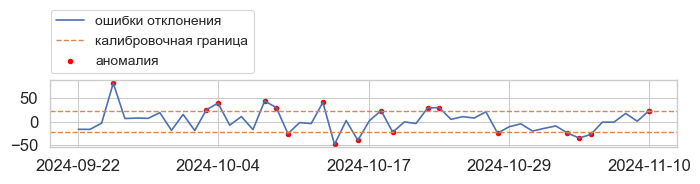

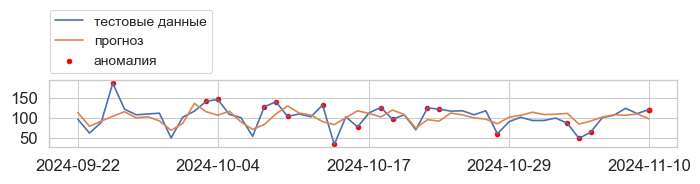




Локация 11785



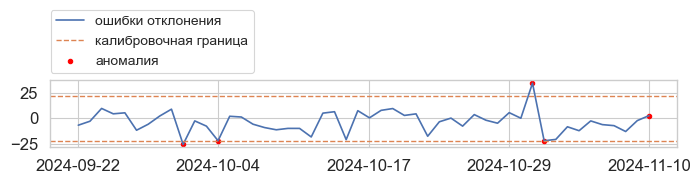

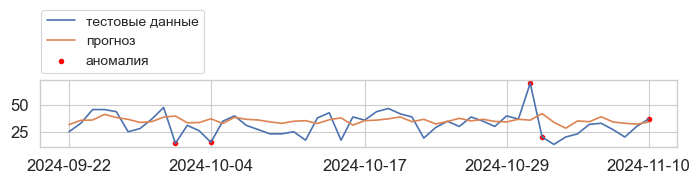




Локация 44560



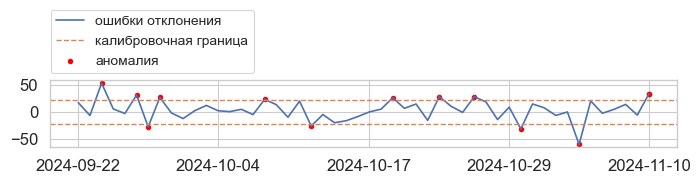

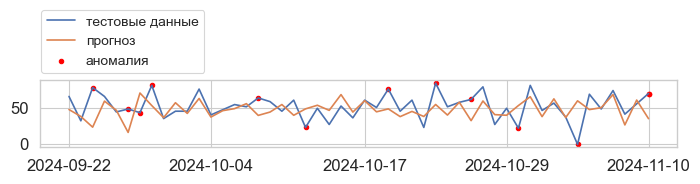




Локация 45460



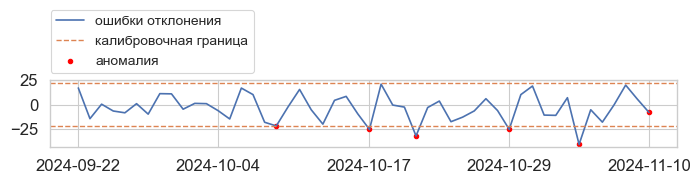

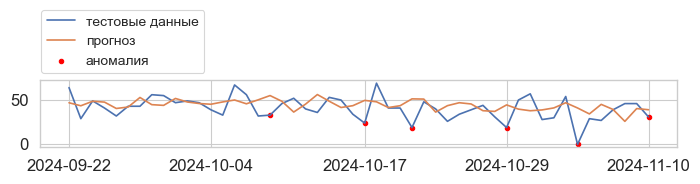




Локация 42060



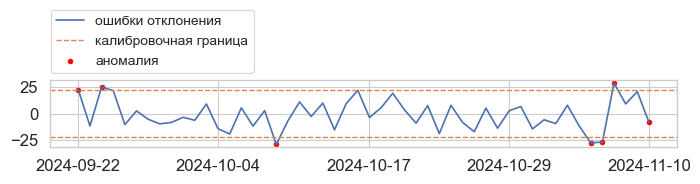

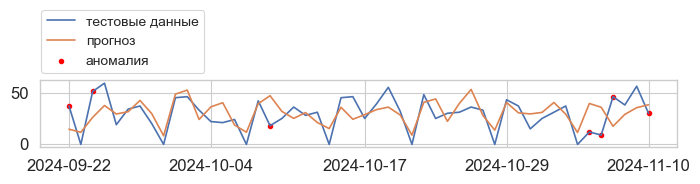




Локация 60360



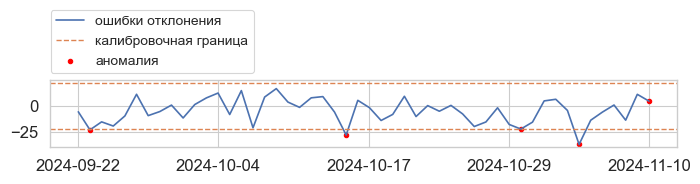

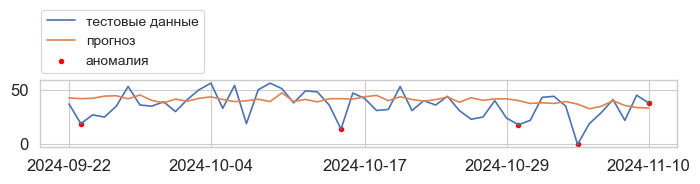




Локация 19860



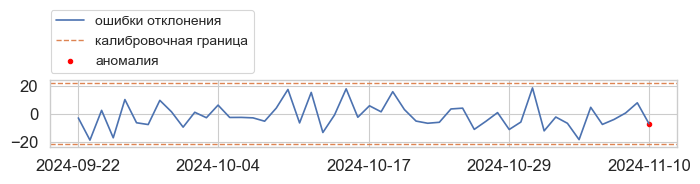

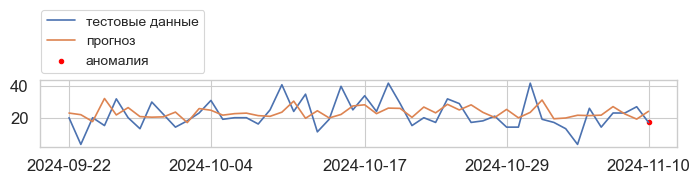




Локация 30563



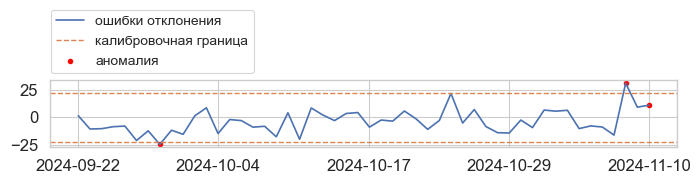

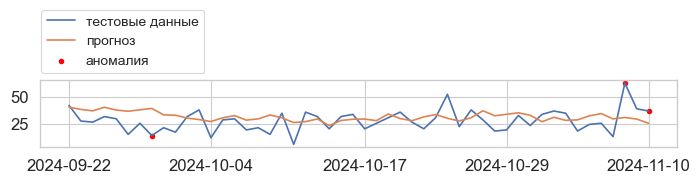




Локация 45070



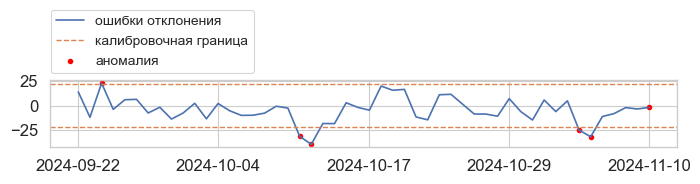

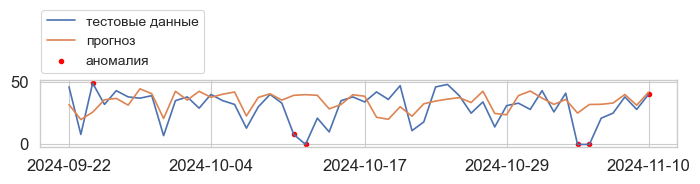




Локация 39263



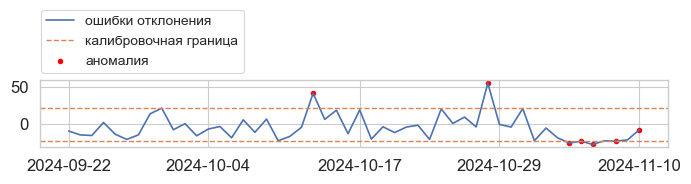

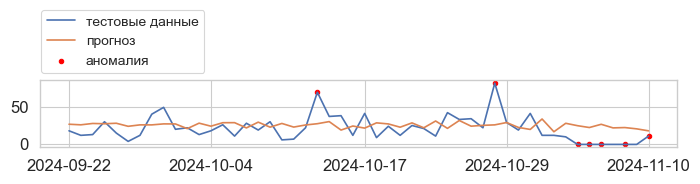




Локация 41360



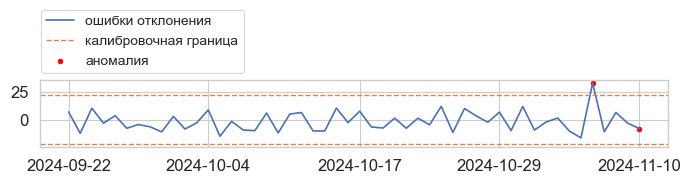

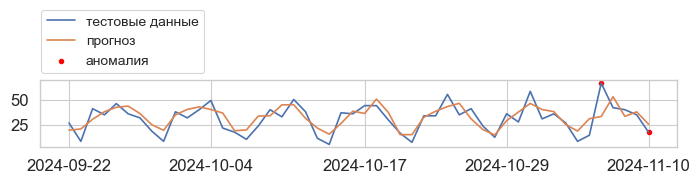




Локация 14260



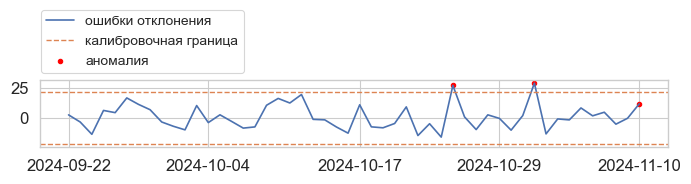

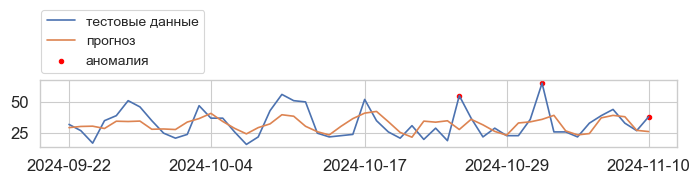




Локация 62060



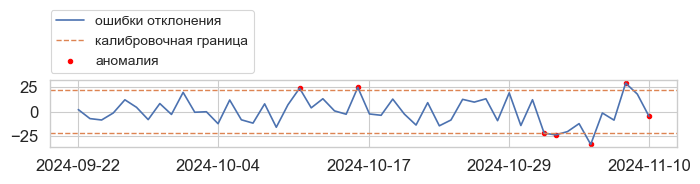

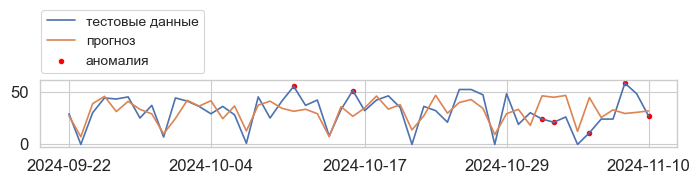




Локация 10461



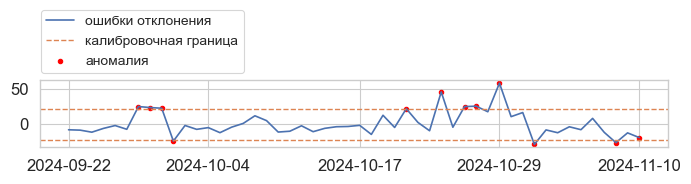

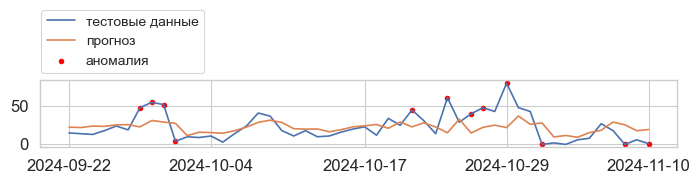




Локация 42663



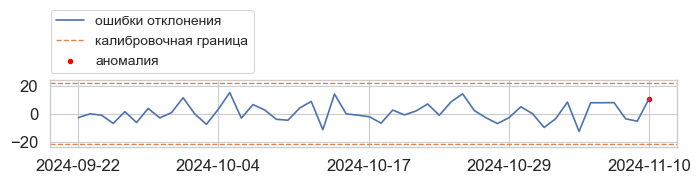

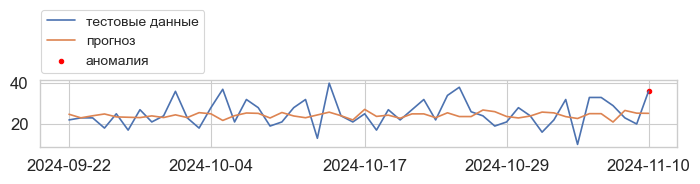




Локация 44567



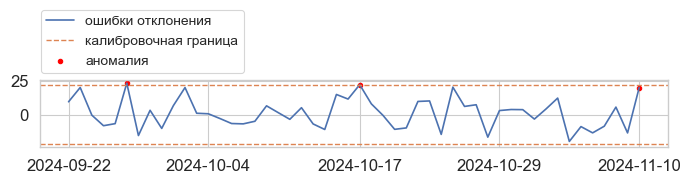

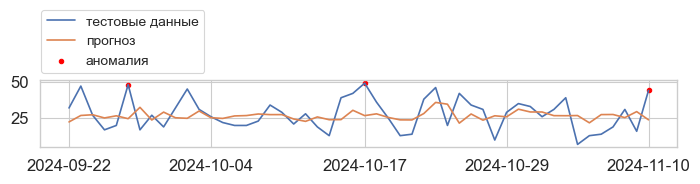




Локация 35060



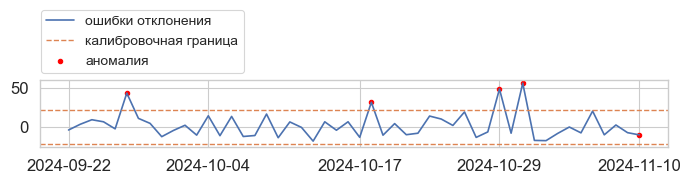

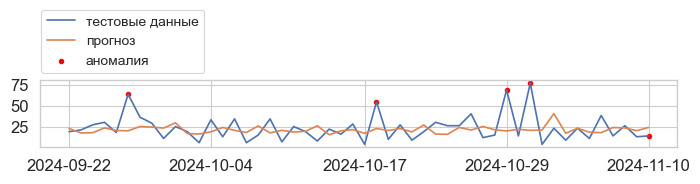




Локация 62560



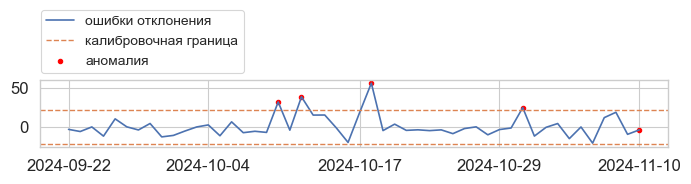

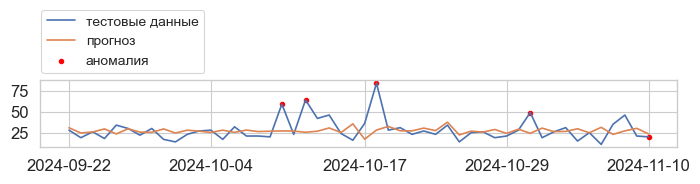




Локация 12160



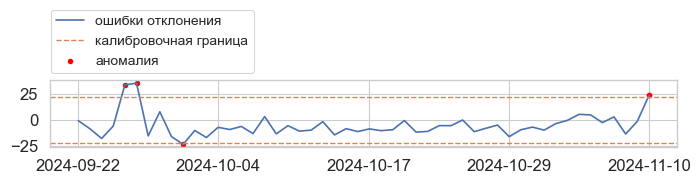




Локация 40060



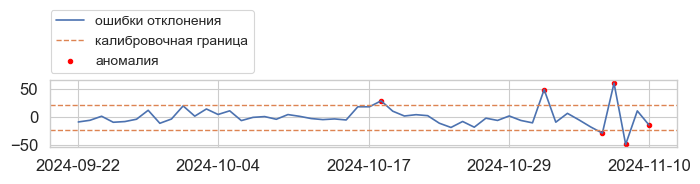

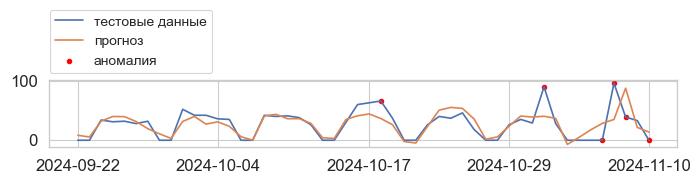




Локация 12965



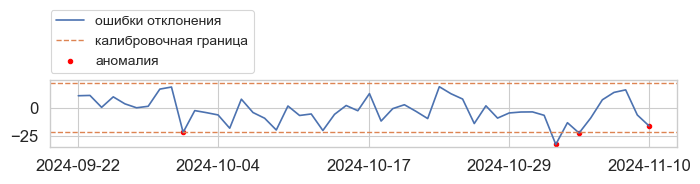

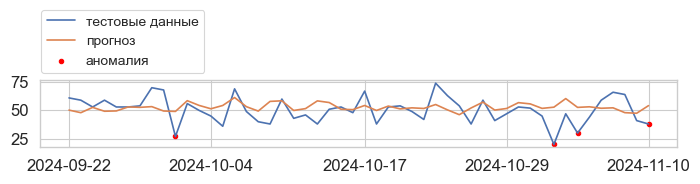




Локация 39063



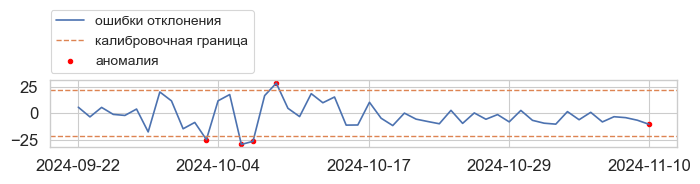

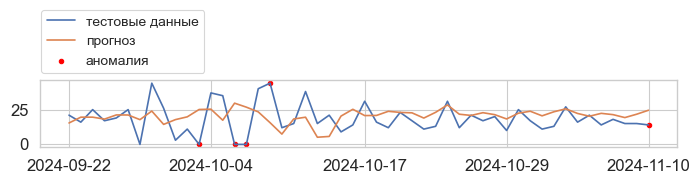




Локация 12954



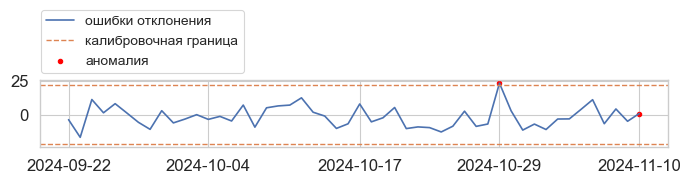

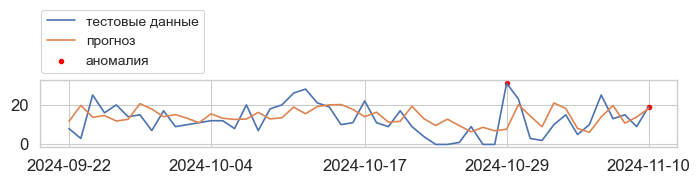




Локация 44565



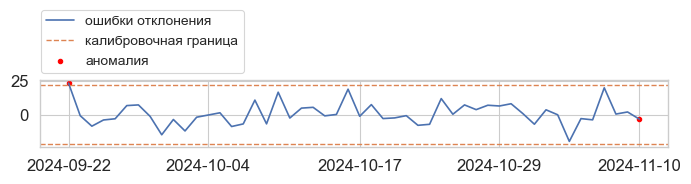

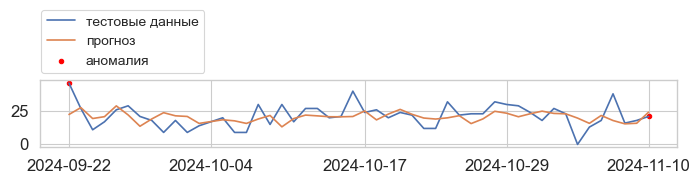




Локация 44563



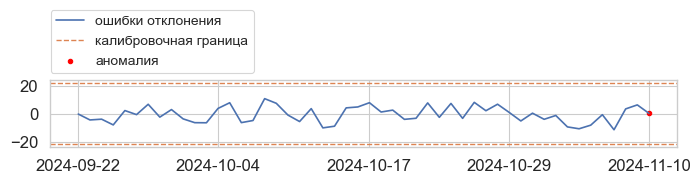

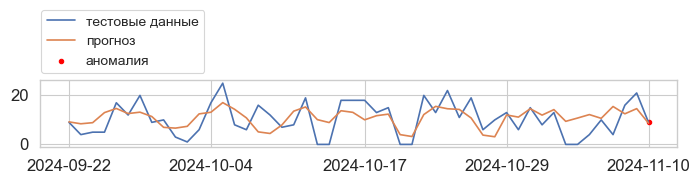




Локация 44564



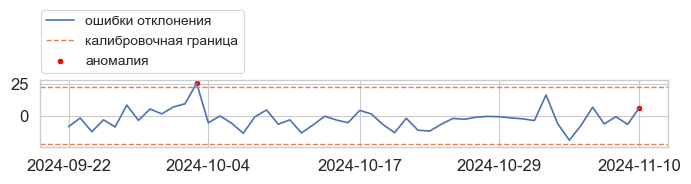

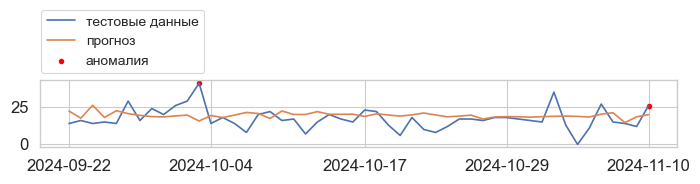




Локация 12560



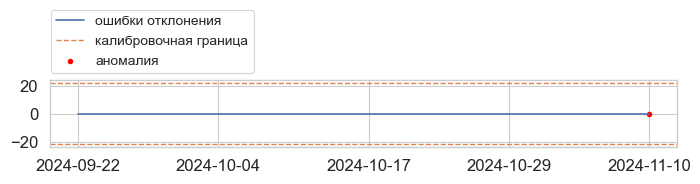

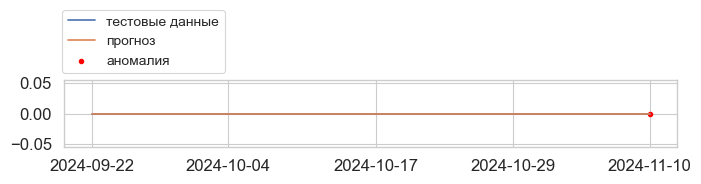




Локация 44566



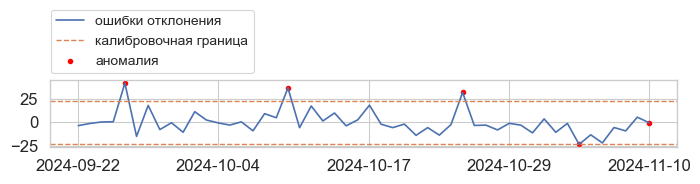

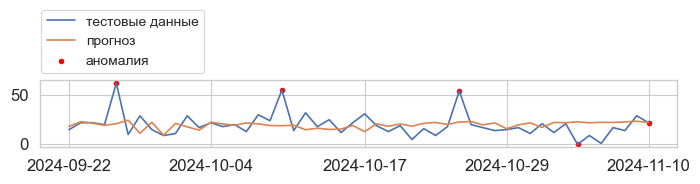




Локация 34460



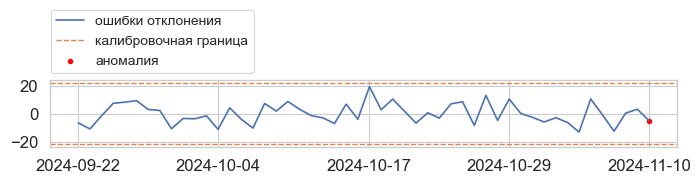

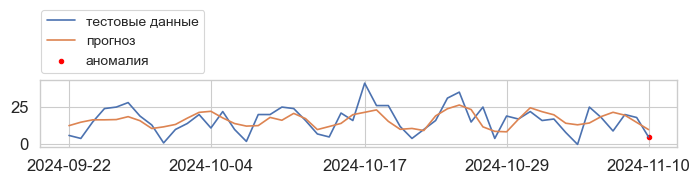




Локация 61460



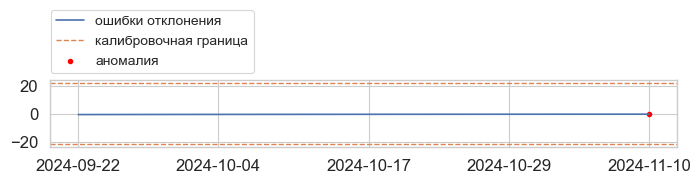

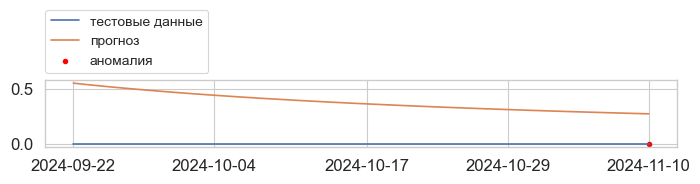




Локация 44594



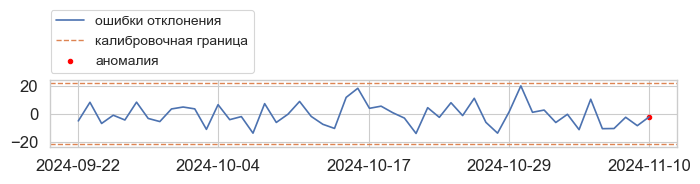

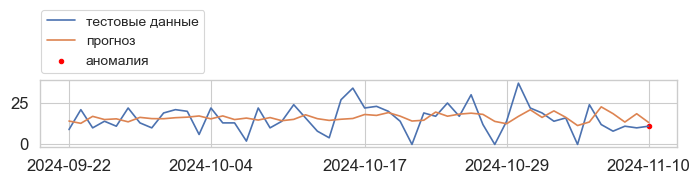




Локация 39465



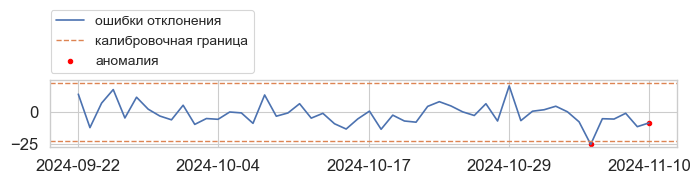

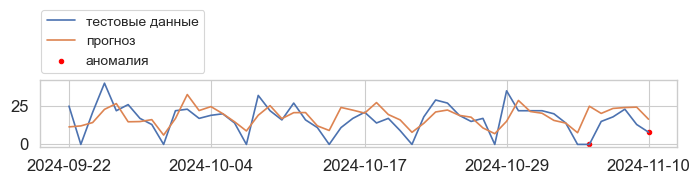




Локация 43263



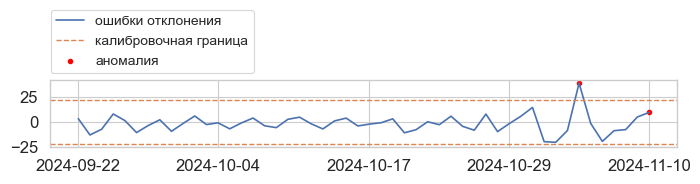

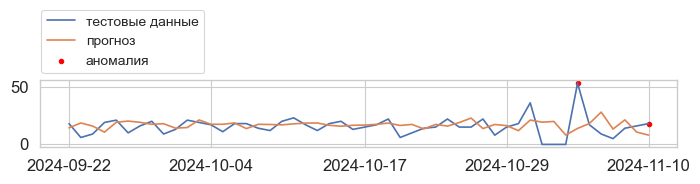




Локация 10901



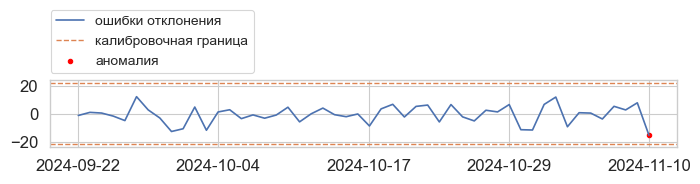




Локация 39863



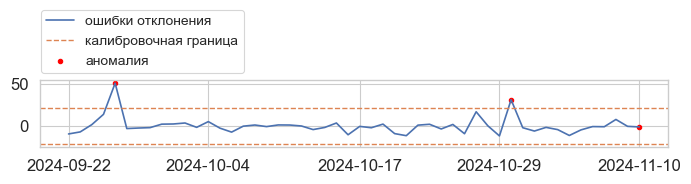

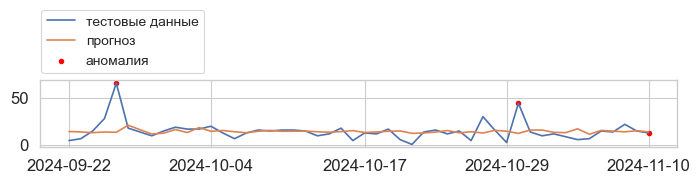




Локация 65663






Локация 44581



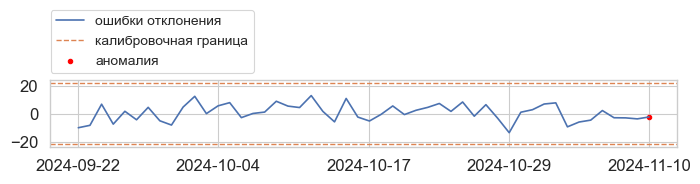

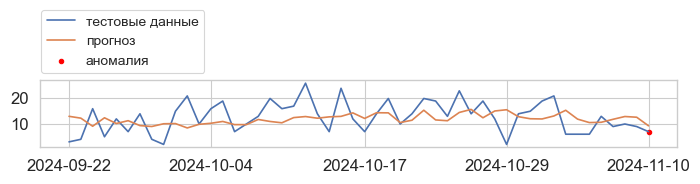




Локация 10960



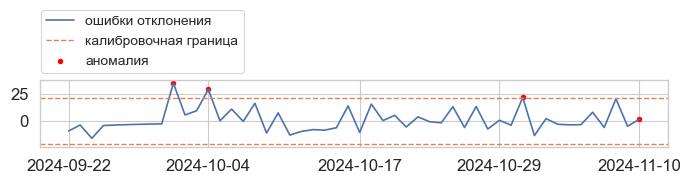

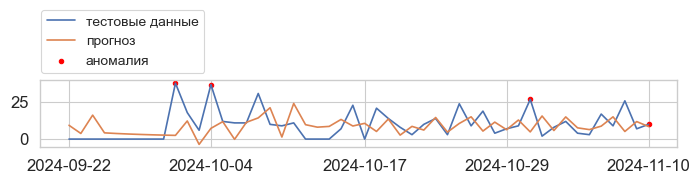




Локация 64460



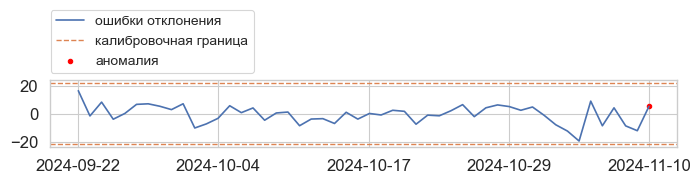




Локация 44597



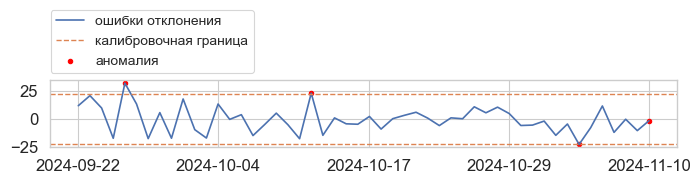




Локация 44583



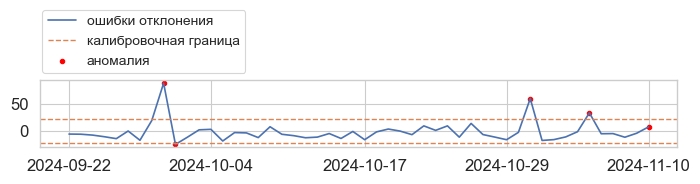

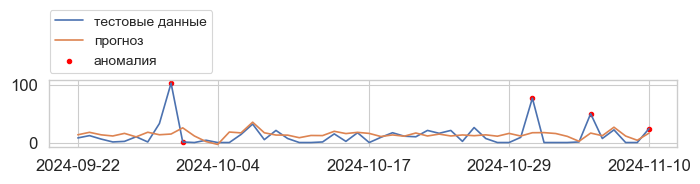




Локация 63060



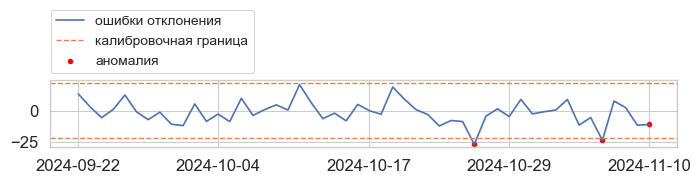

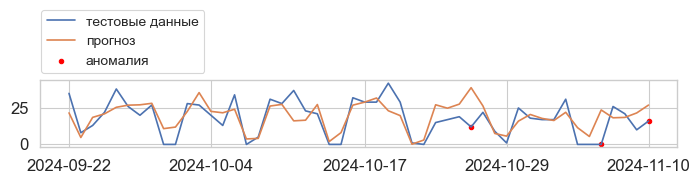




Локация 11965



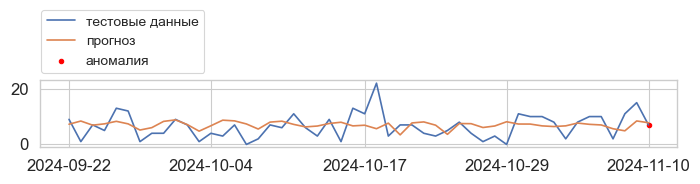




Локация 10363



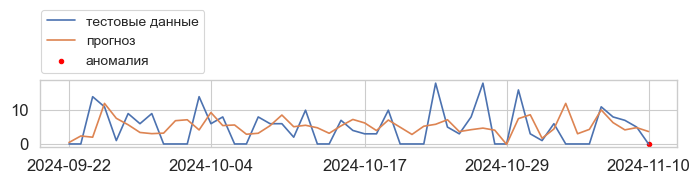




Локация 44569



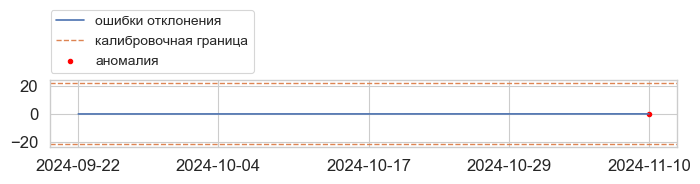

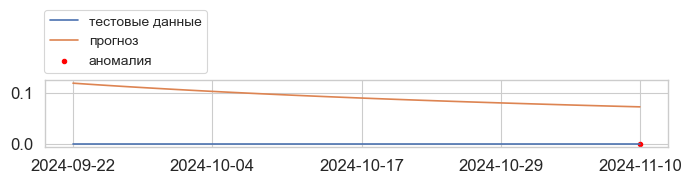




Локация 30865



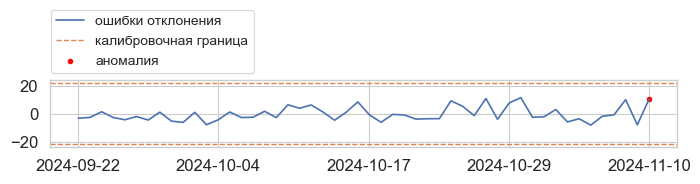

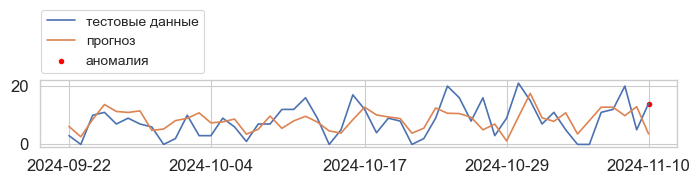




Локация 44589



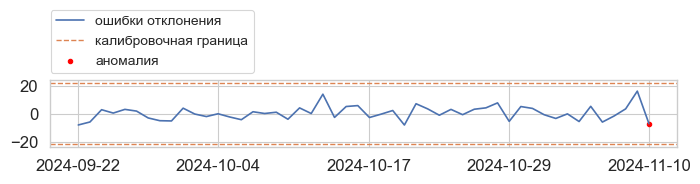

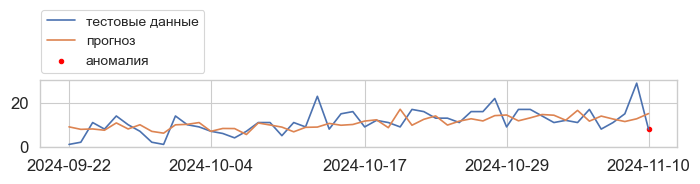




Локация 15663



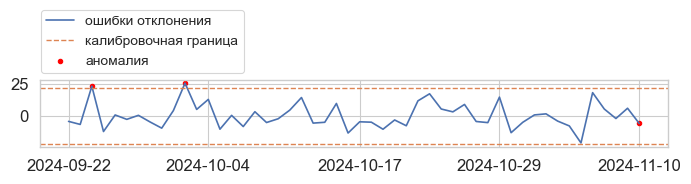

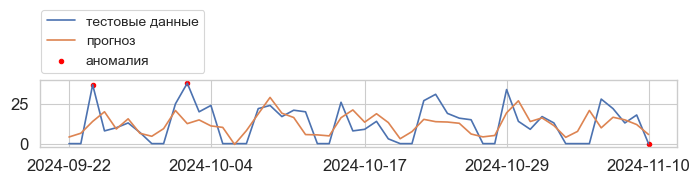




Локация 14160



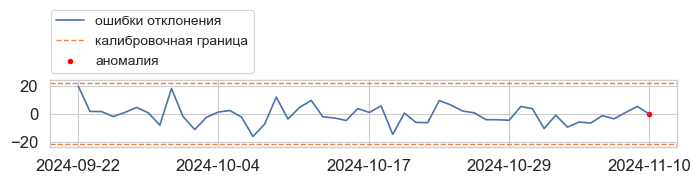

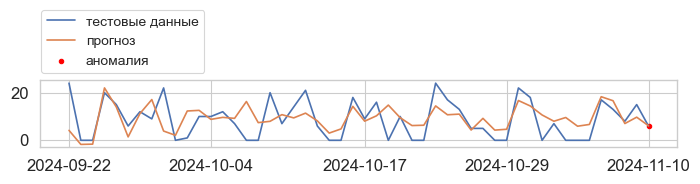




Локация 43063



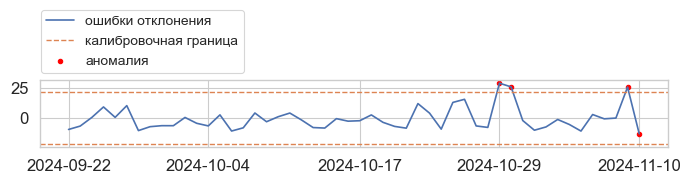

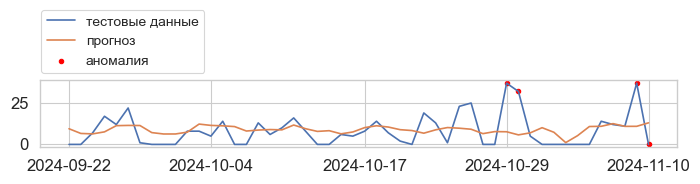




Локация 30863



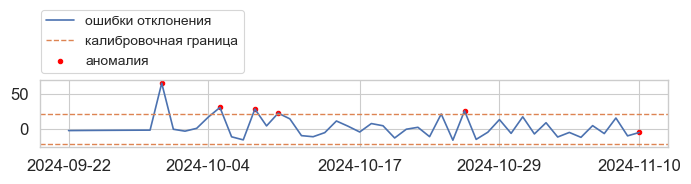

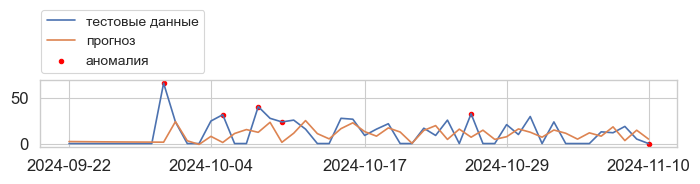




Локация 12561



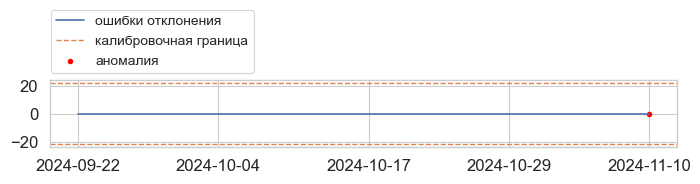

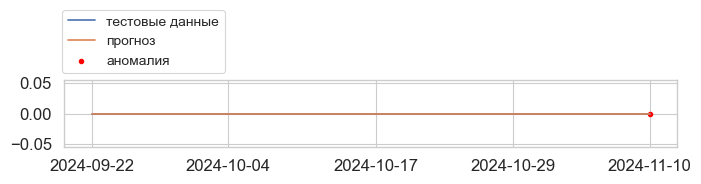




Локация 44063



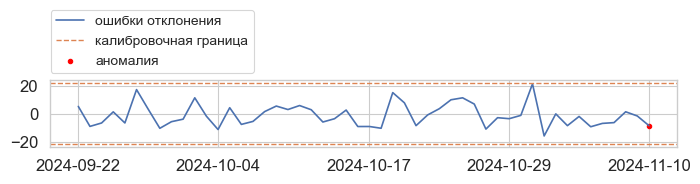

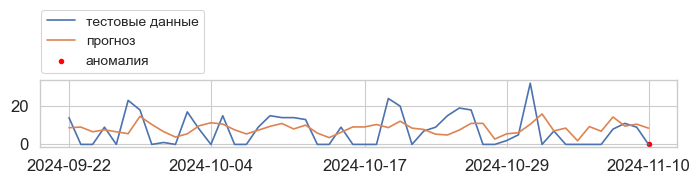




Локация 61470



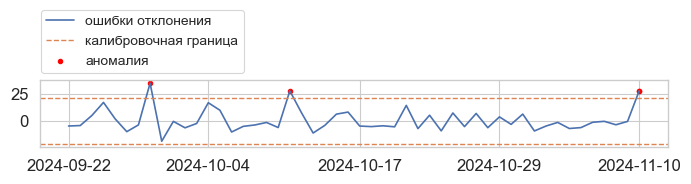

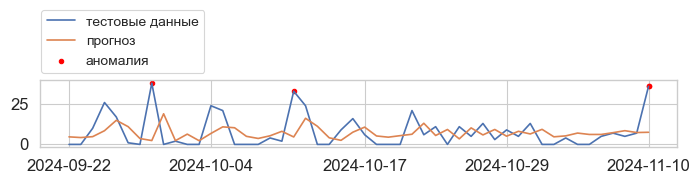




Локация 42360



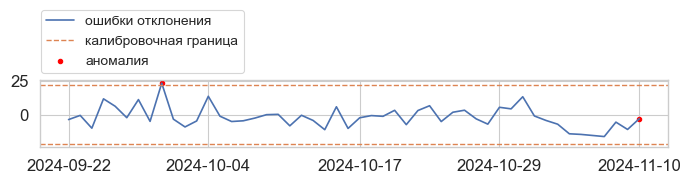

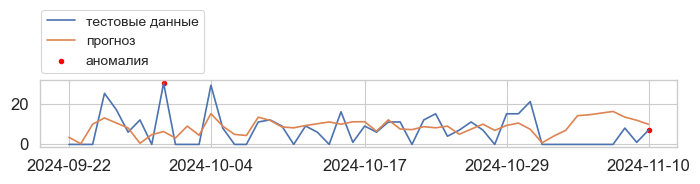




Локация 24863



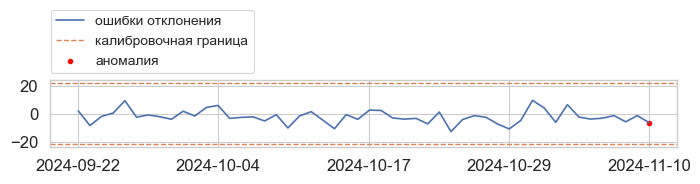

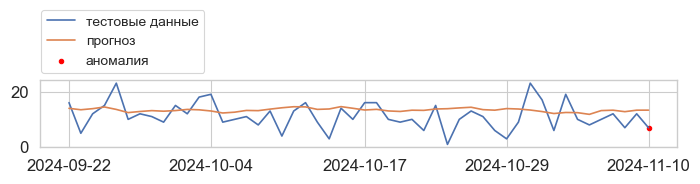




Локация 66463



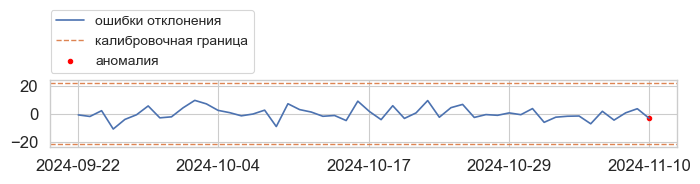

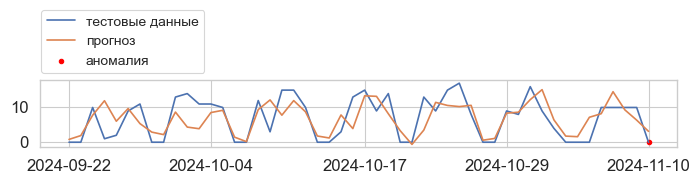




Локация 44670



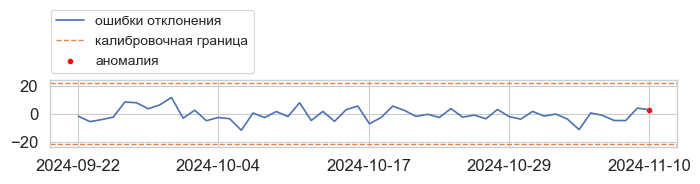

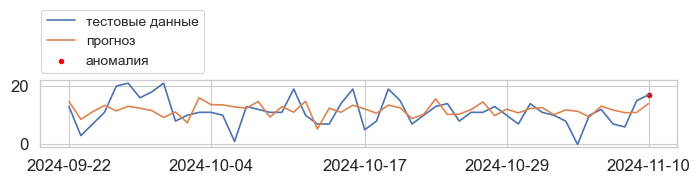




Локация 61063



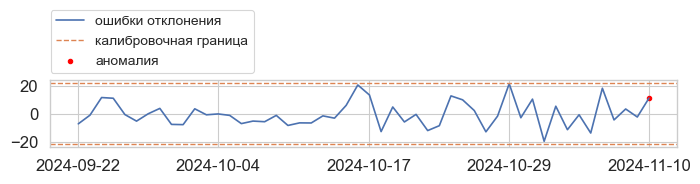

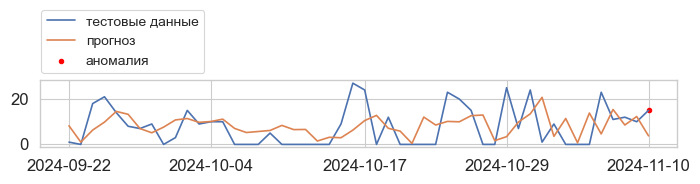

In [419]:
# построение графиков для оценки прогнозирующей спосомности модели 
for col in errors.columns:
    print('Локация ' + str(col))
    print('')
    plt.figure(figsize=(7.2, 2))
    plt.plot(errors.index.values, errors[col].values, label='ошибки отклонения')
    plt.axhline(y=delta_cr, color='#DD8452', ls='--', lw=1, label='калибровочная граница')
    plt.axhline(y=-delta_cr, color='#DD8452', ls='--', lw=1)
    plt.xticks(ind, labels=moments_for_xticks)
    for row in errors.index:
        if abs(errors.loc[row, col]) > delta_cr:
            plt.scatter(row, errors.loc[row, col], color='red', s=10, alpha=1)
    plt.scatter(row, errors.loc[row, col], color='red', s=10, alpha=1, label='аномалия')
    plt.legend(loc='lower center', bbox_to_anchor=(0.163, 1), ncol=1)
    plt.tight_layout()  
    plt.show()  
    print('')
    plt.figure(figsize=(7.2, 2))
    plt.plot(test.index.values, test[col].values, label='тестовые данные')
    plt.plot(test.index.values, pred_by_best_model[col].values, label='прогноз')
    plt.xticks(ind, labels = moments_for_xticks)
    for row in errors.index:
        if abs(errors.loc[row, col]) > delta_cr:
            plt.scatter(row, test.loc[row, col], color='red', s=10, alpha=1)
    plt.scatter(row, test.loc[row, col], color='red', s=10, alpha=1, label='аномалия')
    plt.legend(loc='lower center', bbox_to_anchor=(0.13, 1), ncol=1)
    plt.tight_layout()  
    plt.show()   
    print('')
    print('')
    print('')

# Рейтинг аномалий по времени

Дата: 2024-09-22



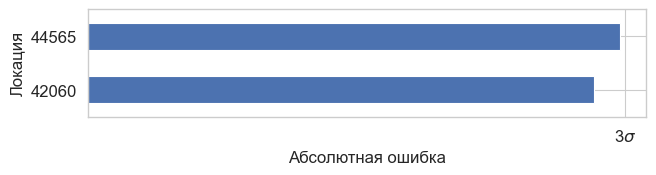




Дата: 2024-09-23



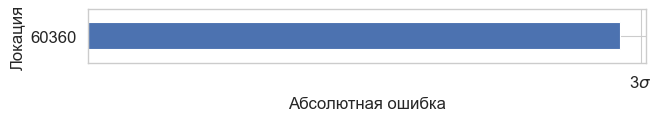




Дата: 2024-09-24



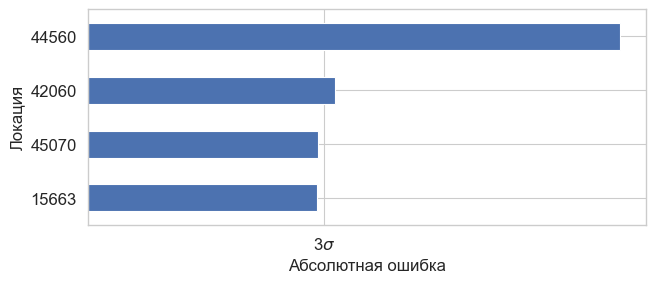




Дата: 2024-09-25



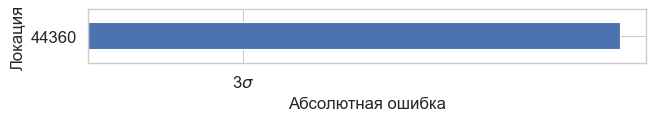




Дата: 2024-09-26



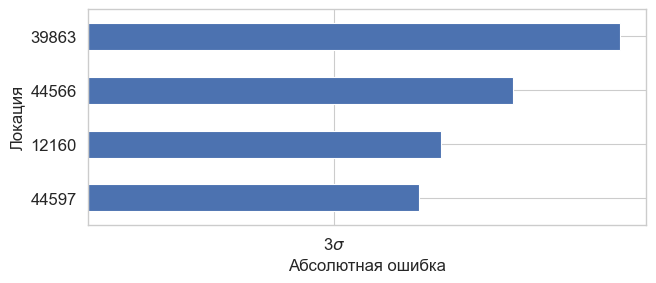




Дата: 2024-09-27



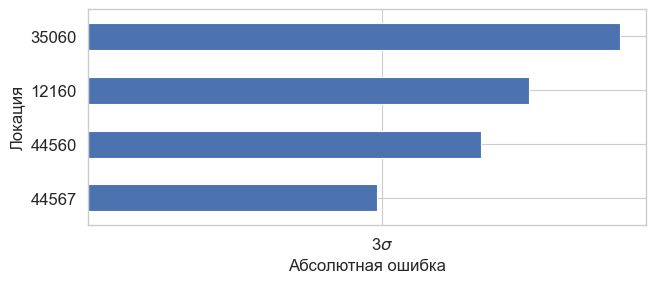




Дата: 2024-09-28






Дата: 2024-09-29



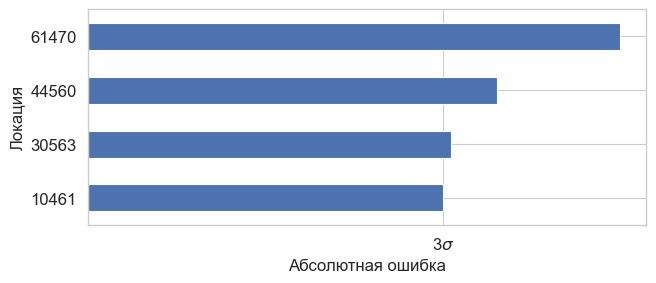




Дата: 2024-09-30



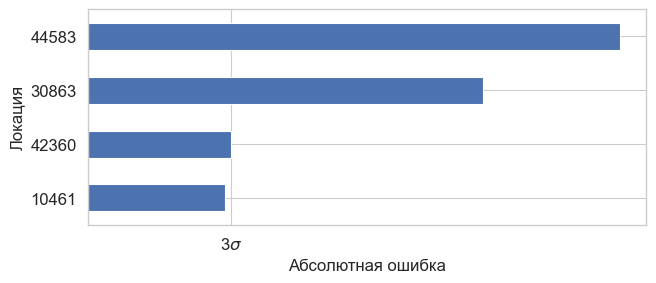




Дата: 2024-10-01






Дата: 2024-10-02



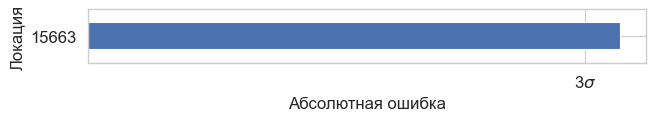




Дата: 2024-10-03



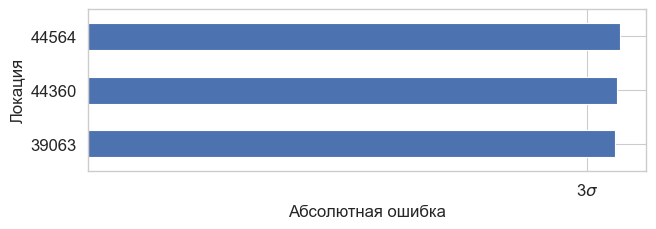




Дата: 2024-10-04



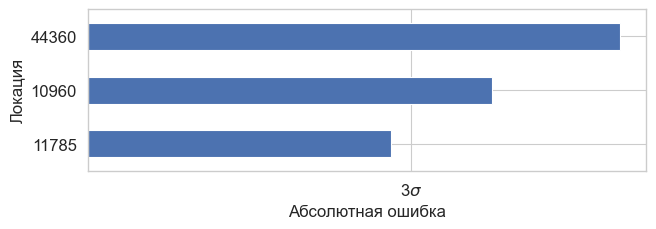




Дата: 2024-10-05



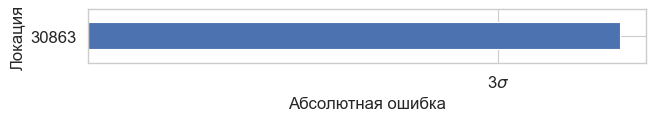




Дата: 2024-10-06



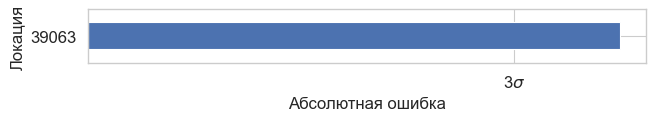




Дата: 2024-10-07



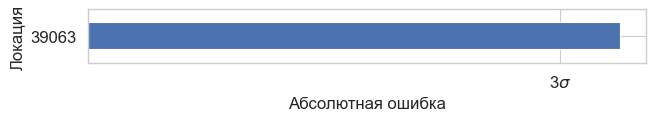




Дата: 2024-10-08



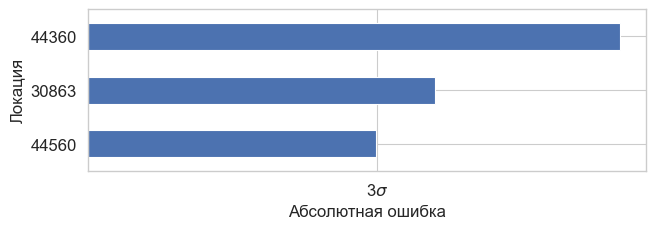




Дата: 2024-10-09



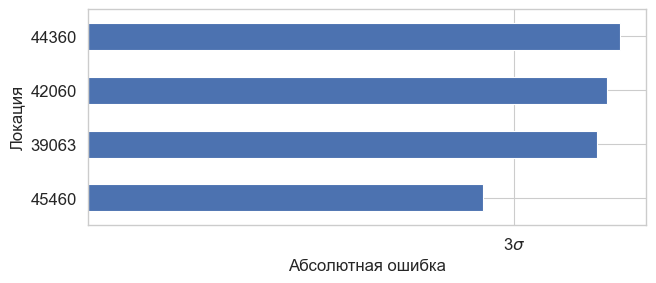




Дата: 2024-10-10



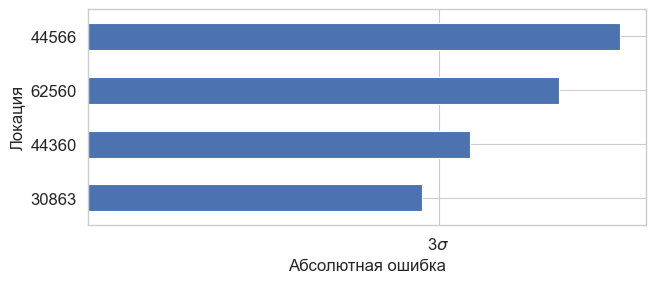




Дата: 2024-10-11



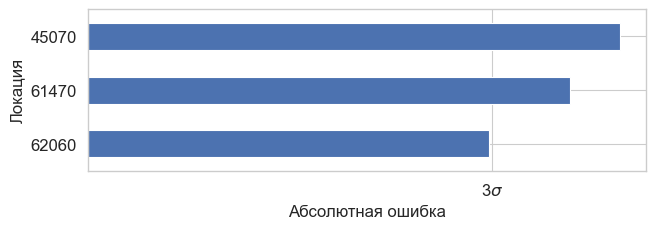




Дата: 2024-10-12



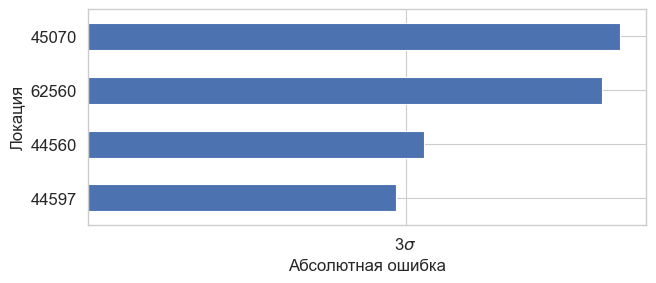




Дата: 2024-10-13



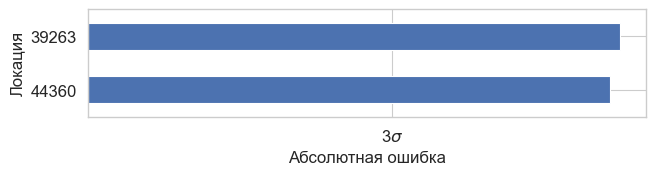




Дата: 2024-10-14



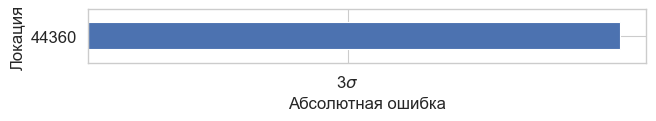




Дата: 2024-10-15



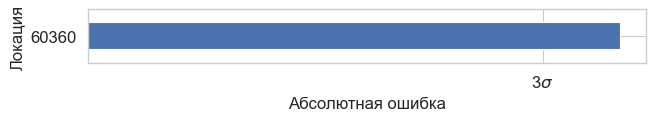




Дата: 2024-10-16



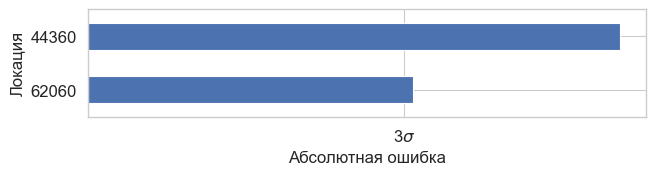




Дата: 2024-10-17



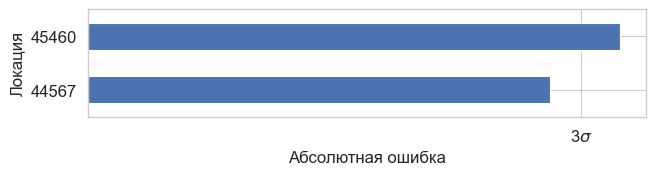




Дата: 2024-10-18



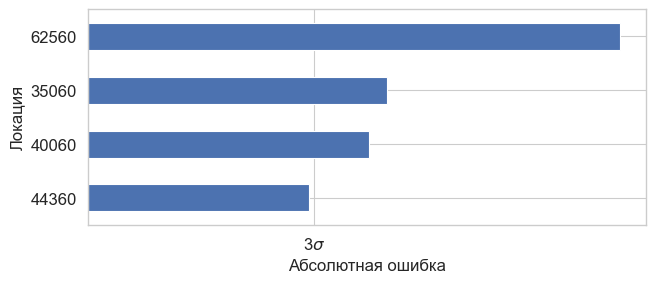




Дата: 2024-10-19



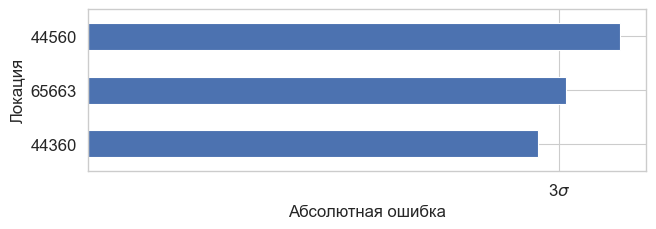




Дата: 2024-10-21



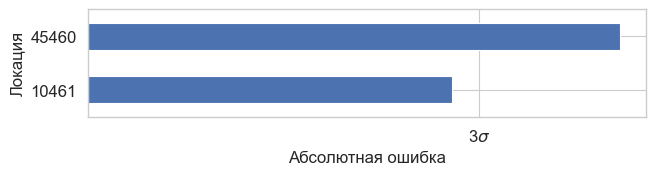




Дата: 2024-10-22



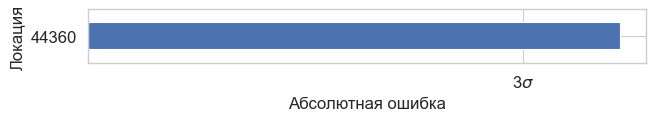




Дата: 2024-10-23



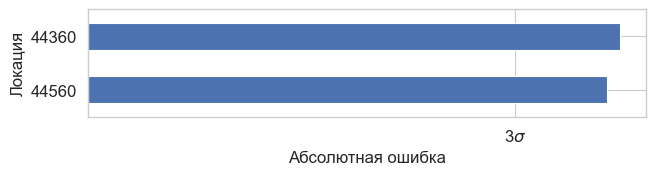




Дата: 2024-10-24



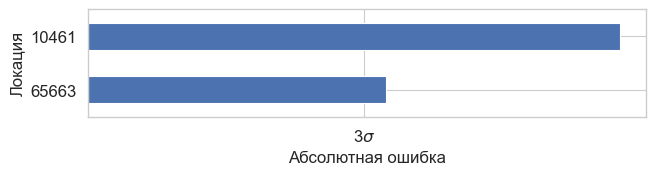




Дата: 2024-10-25



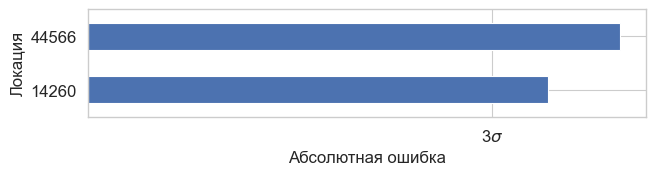




Дата: 2024-10-26



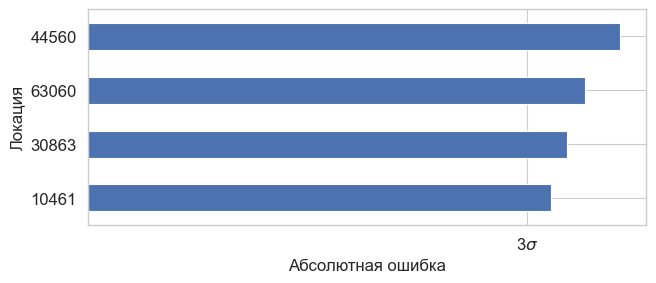




Дата: 2024-10-27



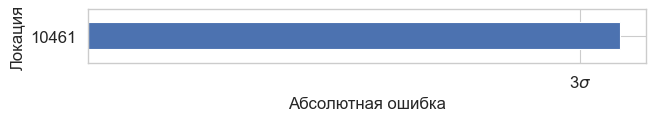




Дата: 2024-10-28



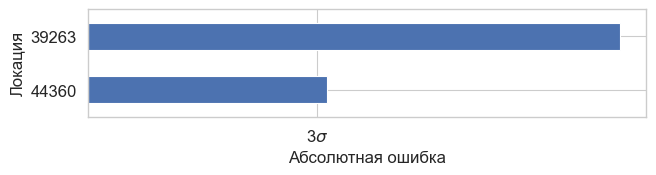




Дата: 2024-10-29



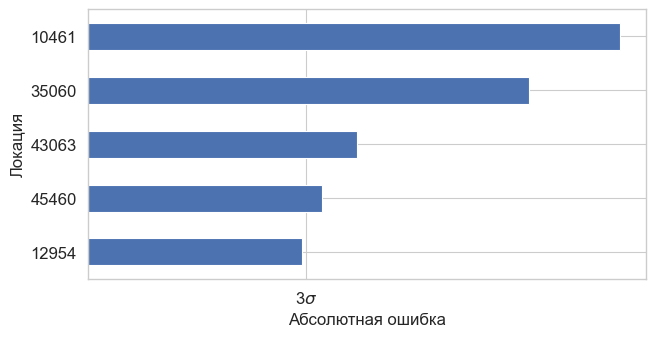




Дата: 2024-10-30



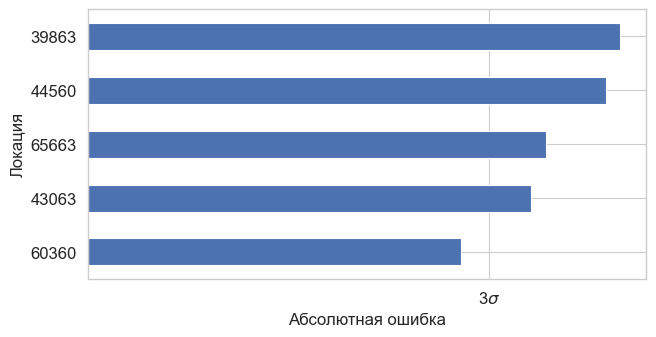




Дата: 2024-10-31



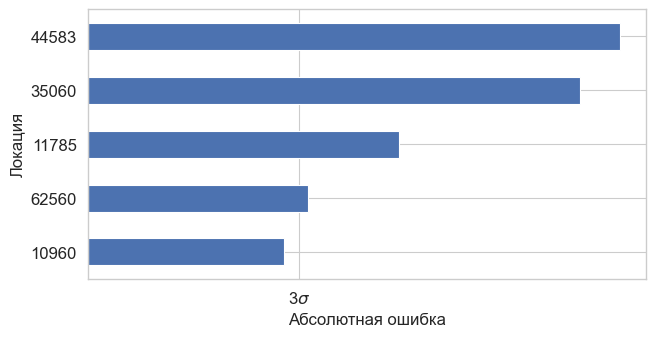




Дата: 2024-11-01



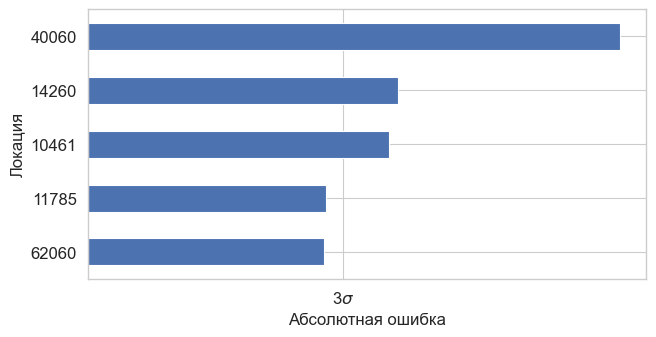




Дата: 2024-11-02



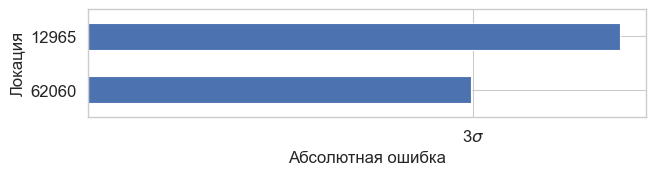




Дата: 2024-11-03



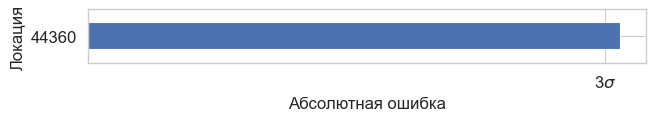




Дата: 2024-11-04



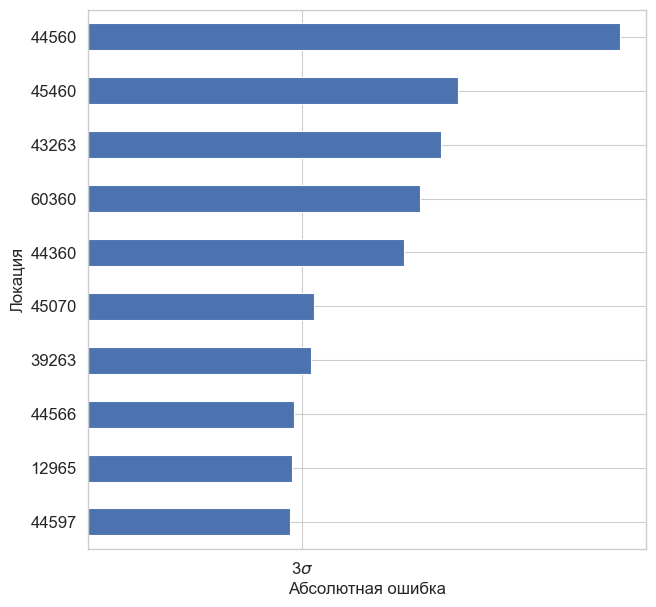




Дата: 2024-11-05






Дата: 2024-11-06



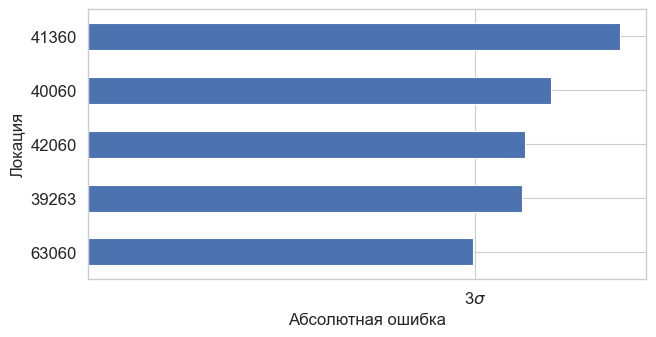




Дата: 2024-11-07






Дата: 2024-11-08



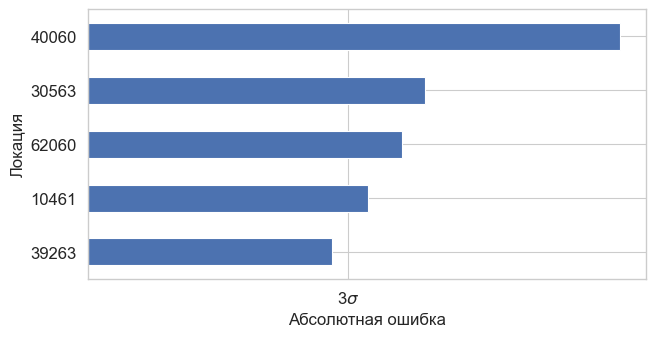




Дата: 2024-11-09



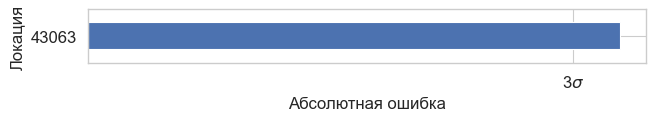




Дата: 2024-11-10



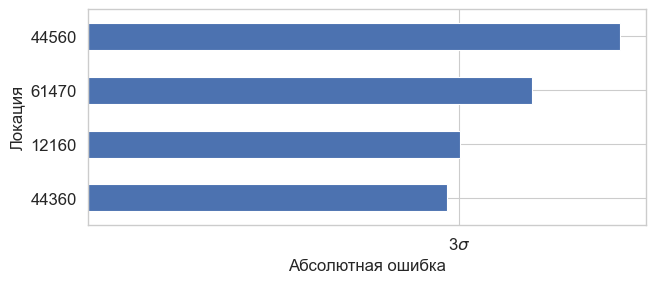

In [420]:
for row in abs_errors.index:
    dict_={}
    for col in abs_errors.columns:
        if abs_errors.loc[row, col] > delta_cr:
            delta = abs_errors.loc[row, col]/sigma
            dict_[col] = delta
    if len(dict_.keys()) > 0:
        dict_ = dict(sorted(dict_.items(), key=lambda item: item[1], reverse=False))
        moment = moments[row-100]
        print('Дата: ' + moment)
        print('')
        plt.figure(figsize=(7.2, 0.7*len(dict_.keys())))
        data = pd.Series(dict_.values(), index=dict_.keys())
        data.plot.barh()
        plt.xticks([3], labels = ['3$\sigma$'])
        plt.xlabel('Абсолютная ошибка')
        plt.ylabel('Локация')
        plt.show()
        print('')
        print('')
        print('')